# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

Dataset here : https://www.batadal.net/data.html You will need Training Dataset 1, Training Dataset 1 and Test Dataset.

## Group Number : 27

## Student 1 
### Name : Joost Bambacht
### ID : 4025016

## Student 2
### Name : Lennart Overdevest
### ID : 4374436

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

1. pip3 install -r requirements.txt
2. Run the code fragment for each task separately
3. Some executions may take some time

## 1. Familiarization task – 1 A4

### 1a. Plot visualizations 

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import familiarization as fam
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = fam.load_data("data/BATADAL_dataset03.csv")
tdata = fam.pre_process(data)

# Plot sample signals
print("\nFigure 1: types of signals in dataset")
fam.plot_signal(tdata,"L_T1",0,720,"Water level of tank 1","blue")
fam.plot_signal(tdata,"F_PU1",0,720,"Flow through pump 1","green")
fam.plot_signal(tdata,"S_PU2",0,720,"Status of pump 2","red")
fam.plot_signal(tdata,"P_J280",0,720,"Pressure of joint 280","black")

# Determine and plot correlation between signals
print("\nFigure 2: correlation between signals")
fam.plot_correlation(tdata)

# Example of almost perfectly correlated signals
print("\nFigure 3: perfectly correlated signals")
fam.plot_signal(data,"F_PU2",0,720,"Flow in pump 2","blue")
fam.plot_signal(data,"S_PU2",0,720,"Status of pump 2","red")

# Example of almost perfectly negatively correlated signals
print("\nFigure 4: perfectly negatively correlated signals")
fam.plot_signal(data,"F_PU1",0,720,"Flow in pump 1","blue")
fam.plot_signal(data,"F_PU2",0,720,"Flow in pump 2","red")

# Example of almost perfectly negatively correlated signals
print("\nFigure 5: prediction of the water tank signals")
signals = ["L_T1", "L_T2", "L_T3", "L_T4", "L_T5", "L_T6", "L_T7"]
rmse = list()
for signal in signals:
    rmse.append(fam.predict_signal(data,signal,0.9))
print("Average RMSE:",np.mean(rmse))


Figure 1: types of signals in dataset


<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>


Figure 2: correlation between signals


<Figure size 2500x2000 with 2 Axes>


Figure 3: perfectly correlated signals


<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>


Figure 4: perfectly negatively correlated signals


<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>


Figure 5: prediction of the water tank signals


<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

Average RMSE: 0.2850589383381013


### 1b. Answers to the three questions

SCADA is a system/network of software and hardware components in which the data from sensors and other industrial components like pumps and valves can be monitored and controlled from a centralized computer. These kind of systems are vunerable to cyber-physical attacks.

The BATADAL dataset is a representation of (measured) data over time from tanks (7), pumps (11), valves (4, of which 1 actionable), and other hydraulic components like joints (12 in total) from the C-Town water distribution system. The information that is embedded in the dataset contains the water level in each tank, the flow through each pump and valve and their status at that time (0 for off, 1 for on), and the pressure in the joints. Each record additionally stored the date and hour, and the attack flag status (0 for no attack, 1 for attack, and -999 as unknown(?)).

##### Signal types
The signals that can be extracted from the dataset thus are the levels in the water tank, the flow through the pumps and valves, the status of each pump/valve over time, and the pressure in the joints. In Figure 1 all four signals can be seen over about a month in time for illustration purpose only. We can clearly see that the patterns for all signals are between boundaries, and look like to be repeating/cyclic in some form. We also see that the status indeed switches from off and on, although the value is only measured once every hour.

##### Correlation
To see if the signals are correlated we can determine the correlation between any columns in the dataset, and create a heatmap to easily visualize the correlation (see Figure 2). We see that most signals have a no correlation (value +-0), while there exist some perfect correlated signals (excluding the signals with theirselves) and perfect negatively correlated signals (signals move in opposite direction). For example the correlation of the flow of pump 2 (F_PU2) with the status of pump 2 (S_PU2) is 0.998614, meaning they are perfectly correlated. This is ofcourse not strange since if the pump is enabled (status code 1) the flow in the pump is also enabled, see Figure 3 for pattern comparison of a part of the signals. If we look at other signals (that are not from the same component), we see that for instance the flow in pump 1 is almost perfectly correlated with the pressure in joint 280, with a correlation value of 0.907052. This probably indicates that joint 280 is the connection leaving pump 2, while it is connected to something that is not flowing at the same speed as pump 2. We also see (Figure 4) that for instance the signals from F_PU1 and F_PU2 are perfectly negatively correlated with a value of -0.949012, meaning that when the signal from one of the two is going up or down, the other one is moving in the opposite direction. 

From the signals we can easily see that they look to be cyclic. From the flow in pump 2 signals in Figure 3 we see that in 24 hours (although it is measured ones per hour) the frequency of the signal repeating is about 14 times. The cycle is not a perfect sinusoidal, but the similarity between them is very well visible.

###### Prediction
For the prediction of the signals we use an AutoRegressive model that is trained by a training set, and for the prediction it takes previous observation(s) of the time series into account. The lag has been chosen to be closer to zero and not bigger since the more recent previous observations should be more important than extra previous observations (adding more lag decreases the influence of all other observations). In Figure 5 the original and predicted signals of the water tanks can be seen, including their RMSE. We can see that for all signals did well, although for signals L_T4, L_T5 and L_T7 the prediction is less accurate than for the others. If we compare signals L_T1 and L_T6, at first sight L_T1 looks like to be predicted better by a lot. If we look at the RMSE the difference is just a fraction.

If instead of the water levels of the tanks we try to predict the signals of the flows of the 11 pumps, the result is very different. The average RMSE is increased to 7.59, and the predicted signal does not follow the curves of the original signal at all for most signals.

Predicting the next value in a series thus differs if the signal is applicable for it. From what we've seen is that the water levels in the tanks are very fitting for prediction, while the flow in the pumps are not.


## 2. LOF task – 1/2 A4 – Individual - Lennart

### 2a. Plot LOF scores

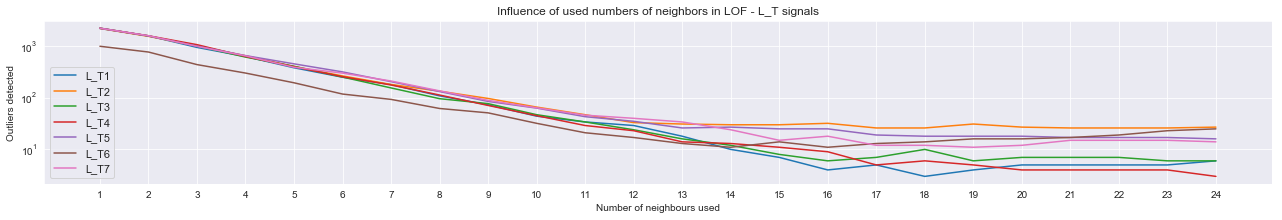

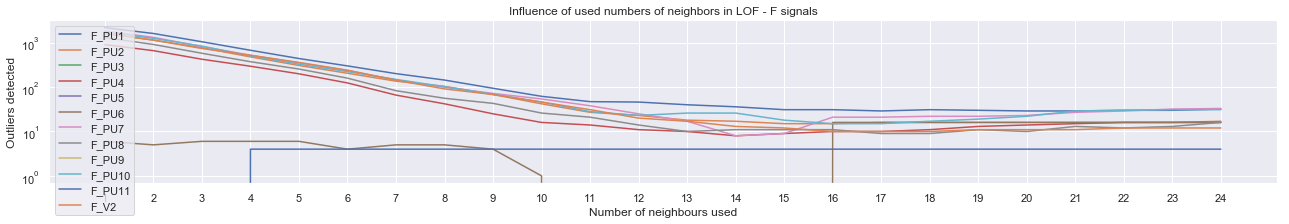

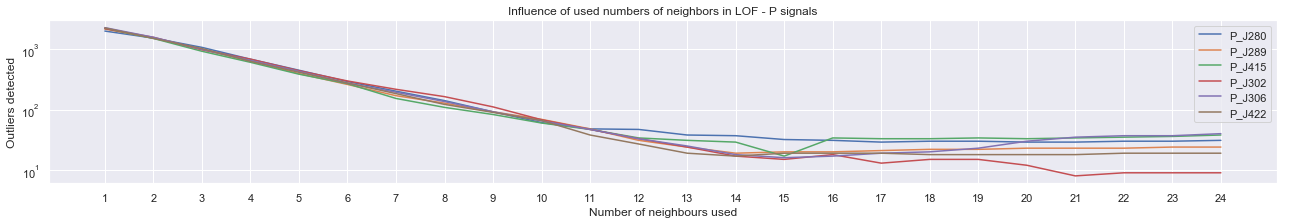

In [2]:
import familiarization as fam
import anomaly_detection as dtc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

data = fam.load_data("data/BATADAL_dataset03.csv")
test_data = fam.load_data("data/BATADAL_test_dataset.csv")
# Drop sequential context
data = data.drop(['DATETIME'], axis = 1) 
lof_data = [ [] for _ in range(len(data['P_J306'])) ]

# Define groups of signals
LT_signals = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7']
F_signals = ['F_PU1', 'F_PU2','F_PU3', 'F_PU4','F_PU5','F_PU6', 'F_PU7', 'F_PU8', 'F_PU9', 'F_PU10', 'F_PU11', 'F_V2']
P_signals = ['P_J280',  'P_J289', 'P_J415', 'P_J302', 'P_J306',  'P_J422']

# Define the maximial amount of nearest neighbours to use in the LOF method
max_neighbours = 25
# Compute and plot for each signal the LOF performance
LT_lof = dtc.compute_lof(data, LT_signals, max_neighbours)
dtc.plot_lof(LT_lof, LT_signals, max_neighbours, "Influence of used numbers of neighbors in LOF - L_T signals")

F_lof = dtc.compute_lof(data, F_signals, max_neighbours)
dtc.plot_lof(F_lof, F_signals, max_neighbours, "Influence of used numbers of neighbors in LOF - F signals")

P_lof = dtc.compute_lof(data, P_signals, max_neighbours)
dtc.plot_lof(P_lof, P_signals, max_neighbours, "Influence of used numbers of neighbors in LOF - P signals")

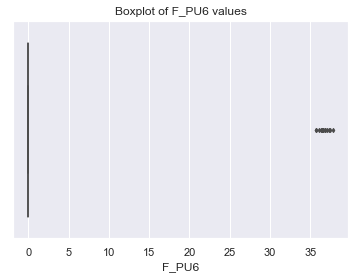

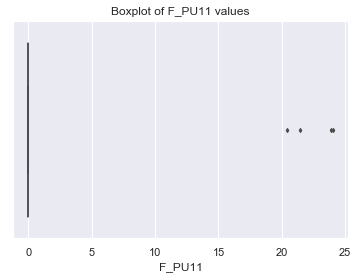

In [3]:
# Only used for clarification of the performance of the LOF 
sns.boxplot(data['F_PU6'], fliersize=3)
plt.title("Boxplot of F_PU6 values")
plt.show()
sns.boxplot(data['F_PU11'], fliersize=3)
plt.title("Boxplot of F_PU11 values")
plt.show()

In [24]:
# Find outliers of test data set using the amount of neighbours found by the code above
test_signals = ['L_T1', 'L_T2', 'P_J302']

LT_outliers = dtc.compute_lof(test_data, test_signals, 20, test=1)
top_LT_outliers = []
for i in range(len(LT_outliers)):
    # Sort dictionary by values descending order aka find the most outliers 
    sorted_dict = sorted(LT_outliers[i], key=LT_outliers[i].get, reverse=True)
    # Pick first 50 results and add to array     
    top_LT_outliers.append(sorted_dict[0:50])

### 2b. Analysis and answers to the questions

To test the influence of the number of neighbors used in the algorithm on the detection of anomalies,
the number of neighbors is plotted as a function of the number of anomalies detected. This is done for each type of signal(L_T, F, P). The amount of neighbors used, is chosen from 1 till 25. The upper bound is chosen because in the documentation of the SK-Learn package it is stated that "20 neighbors appears to work well in general". To see if the performance could be increased when using a larger value than 20, the upper bound is set to 25. Another variable that has an impact on the performance of LOF is the threshold used to decide whether a data point is an anomaly. Several threshold values are tested and -1.5 was chosen as the final threshold value.
From the plots above it can be seen that indeed the upper bound of the number of neighbors used could be set to 20 since the number of anomalies detected does not change much after this. An even smaller number of neighbors, approximately 16, could be used for the F and P signal types because they already converged at that point.

Remarkable are the F_P06 and the F_PU11 signals because they follow a different pattern as can be seen in the second plot. If we look at the data points of these two signals in figure 4 and 5, the behavior could relatively easily be explained. As can be seen in the bottom boxplot, the  it consists of four points with a value close to each other and all other points have a value close to zero. In the figure 2 it can be seen that when 3 or less neighbors are used, these points are not seen as outliers because they form a cluster by themself. However, when a higher amount of neighbors is used these are classified as outliers because it uses the distance of a data point with value zero. This results in detecting the four points as outliers.
Approximately, the same reasoning could be used for the behavior of the L_PU6 line. Although, the number of neighbors to reach the detection of the outliers is 16.

Concluded could be that a 20 is a suitable value for the amount of neighbors. Since all signals are converged to a stable solution. This value is of course depends on the threshold value which decides whether a point is an anomaly.
Anomalies in signals could occur when, for example, hardware is not stable. It is very important to know the context around the type of signal. Take F_PU11, as an example, 0.04%(4/8761) of the measured values differ a lot compared to the other 99.96%. Without knowing the context of the type of signal these values would be classified as anomalies. However, knowing that this is the flow through the pump, it could easily be reasoned that the pump is only used very few times.

LOF measures the local deviation of a given point with respect to its neighbours, therefore LOF is a suitable method to detect anomalies in signals, since signals most of the time repeat after some time. However, it is very important to find the optimal value for k. Fortunately, there are many techniques to find the optimal value for k.


## 3. PCA task – 1/2 A4 – Individual - Joost

### 3a. Plot PCA residuals

In [ ]:
%reset -f
%load_ext autoreload
%autoreload 2

import pca_helper as pca_helper
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

data = pca_helper.load_data("data/BATADAL_dataset03.csv")
tdata, labels = pca_helper.pre_process(data)

data2 = pca_helper.load_data("data/BATADAL_dataset04.csv")
tdata2, labels2 = pca_helper.pre_process(data2,True)

# Create residual plots for different number of components, starting from 95% and ending at 99%
variances = [0.95, 0.96, 0.97, 0.98, 0.99]
pca = list()
components = list()
x = list()
x_fitted = list()
error = list()
mean_data = list()
std_data = list()

for var in variances:
    pca.append(PCA(n_components=var, random_state=33))

for p in pca:
    index = pca.index(p)
    x.append(p.fit_transform(tdata))
    components.append(p.components_)
    
    x_fitted.append(np.matmul(x[index],components[index]))
    
    error.append(np.sum((tdata-x_fitted[index])**2,axis=1))
    
    plt.subplots(figsize=(15,3))
    plt.title('PCA Residual including '+str(variances[index])+' of total variance / '+str(len(components[index]))+' components')
    plt.plot(error[index])
    plt.show()
    print("Total error of all components for variance "+str(variances[index])+": ",np.sum(error))
print("Figure 3.1: Residual plots for variance levels 0.95 to 0.99")

# Plot the number of components and its value to the total variance
n_features = len(tdata.columns)
pca_all = PCA(n_components=n_features, random_state=33)
pca_all.fit_transform(tdata)

pca_helper.number_of_components_plot(pca_all, len(tdata.columns), 0.97);
print("Figure 3.2: Number of components at variance level 0.97")

# Detect and remove outliers from dataset
mean = list()
std = list()
outliers = set()
columns = tdata.columns

# For each signal we separately determine the mean and standard deviation,  
# such that outliers can be detected for each signal.
for col in columns:
    mean.append(np.mean(tdata[col]))
    std.append(np.std(tdata[col]))
    
for i in range(len(tdata)):
    row = tdata.loc[i]
    
    for j in range(len(columns)):
        if row[columns[j]] < mean[j]-3*std[j] or row[columns[j]] > mean[j]+3*std[j]:
            outliers.add(i)
            
tdata_without_outliers = tdata.copy()
tdata_without_outliers.drop(outliers, inplace=True)

# Create new residual plots, without the anomalies
pca_new = PCA(n_components=0.97, random_state=33)
x_new = pca_new.fit_transform(tdata_without_outliers)
components_new = pca_new.components_
x_fitted_new = np.matmul(x_new,components_new)
error_new = np.sum((tdata_without_outliers-x_fitted_new)**2,axis=1)

f,ax = plt.subplots(figsize=(15,3))
plt.title('PCA Residual including 0.97 of total variance / 13 components after outlier removal')
plt.plot(error_new)
plt.show()
print("Outliers detected and removed: ",len(outliers))
print("Figure 3.3: Residual plot for variance level 0.97 after anomaly removal")

# Create plot comparison of original dataset vs the removal of outliers
f, ax = plt.subplots(figsize=(20,5))
ax.plot(tdata, color='green');
ax.plot(tdata_without_outliers, color='red');

label_original = matplotlib.patches.Patch(color='green', label='Original Dataset')
label_without_outliers = matplotlib.patches.Patch(color='red', label='Original Dataset without Outliers')
plt.legend(loc='upper right', handles=[label_original, label_without_outliers]);
plt.title("Comparison between original dataset and dataset with outliers removed");
plt.show()
print("Figure 3.4: Comparison of original dataset and after anomaly removal")

# Apply the trained model from the first dataset to the second training dataset.
# For this dataset the actual attacks are known, and can thus be used verify results.
# Compute the (normalized) residual
transformed_data = pd.DataFrame(pca_new.transform(tdata2), tdata2.index)
inverse_data = pd.DataFrame(pca_new.inverse_transform(transformed_data), transformed_data.index, columns=tdata2.columns)
residual = np.abs(np.sum(tdata2-inverse_data,axis=1))
residual = residual/max(residual)

# Find the optimal threshold by plotting all elements.
# We want a high number of TP correspondig with a low FP => high precision
# Pre-calculated optimum at index 448, or 0.5010854719373081 in value
plot_metric_results = False
if plot_metric_results == True:
    pca_helper.plot_threshold_search(residual, labels2)

# Predict labels for threshold
threshold = 0.5010854719373081
labels_pred = pca_helper.predict_labels(residual,threshold)
    
# Plot the result with the computed threshold
f,ax = plt.subplots(figsize=(22,4))
plt.plot(residual, label='Residual', color='blue')
plt.plot(labels2,label='Attack Interval', color='yellow')
plt.axhline(threshold, color='green', label='Threshold')
ax.set_title("Residual plot vs attacks in training set 2, based on model training set 1",size=14)
ax.set_ylabel("Normalized residual error",size=12)
plt.legend(loc='upper right')
plt.show()
print("Figure 3.5: Residual plot of anomaly detection on training set 2")

# Evaluate the performance of the anomaly detection
pca_helper.performance(labels2,labels_pred)


# Plot different types of anomalies detected in residual plot
pca_helper.plot_anomaly_range(residual, 60,85,'point');
pca_helper.plot_anomaly_range(residual, 1700,1800,'collective')
print("Figure 3.6: Types of anomalies detected")

### 3b. Analysis and answers to the questions

Before we can apply PCA we must normalize the training dataset 1. Since PCA is affected by scale the features must be scaled before it can be applied to it. To obtain optimal performance in machine learning algorithms it requires the features of the dataset to be unit scale, with zero mean and variance one. We remove features that contains NaN values. The remaining 36 features can be used for PCA decomposition. For PCA to work with anomaly detection it must lower the number of components because otherwise it has a difficult time differentiating anomalies from normal cases. The cumulative variance of the principal components (n) determines the number of components for a defined threshold. To be able to detect the normal behaviour of the series, enough variance must still be present. However, too much variance can mean that the model has learned about the anomalies as well. 

In Figure 3.1 the PCA residuals of all signals with the corresponding number of components can be seen. It looks like that 99% removes too much anomalies, while for lower than 97% it is hard to distinquish what is an anomaly and what not. The total error increases a lot if the variance is increased. We therefore choose to use a cumulative variance of 97%, containing only 13 components. In Figure 3.2 the number of components is displayed against the cumulative variance. The last 21 components add a lot of error to the residuals, and are considered to be of less use.

The next step is to remove anomalies from the dataset. To remove the outliers we have to set a threshold. We assume a normal distribution. The threshold for normal behaviour samples is estimated to be mean plus/minus three times the standard deviation [1] for each signal separately in the original dataset (after processing). For this interval there are 85 anomalies detected and removed. Some large anomalies are present in the dataset, see Figure 3.4. All signals now behave in somewhat the same boundaries. The model should be trained after these anomalies are removed as much as possible, otherwise the model also learnes information about the anomalies thinking it is normal data. In some situations it may occur that the values of the sensors in the SCADA system do not follow the correct patterns due to for instance an operator that is evaluating a problem, a broken sensor, or a software bug.

The performance of the PCA-based anomaly detection can be evaluated by applying training set 2 to the trained model. We search for a suited threshold on the residual error, in which most attacks can be recognized by just looking at the residuals. The threshold is found by optmizing the precision (maximizing TP and minimizing FP). Training set 2 contains attack labels, such that we can easily evaluate the performance. In Figure 3.5 the residual plot of training set with the calculated threshold is visualized, in combination with the attack labels. It has an accuracy of 91% and a precision of about 96%. There are only 5 false positives, compared to the 123 true positives, which shows good performance for the anomaly detection.

We can also look at the anomaly detections in detail in Figure 3.6, in which a couple of situations are visualised. The first plot indicates a point anomaly and the second one a collective anomaly. There is no contextual anomaly detected.

[1] VARUN CHANDOLA, ARINDAM BANERJEE, and VIPIN KUMAR. Anomaly Detection: A Survey

## 4. ARMA task – 1/2 A4 - Individual - Joost

### 4a. Print relevant plots and/or metrics to determine the parameters.

In [ ]:
%reset -f
%load_ext autoreload
%autoreload 2

import arma_helper

data_train = arma_helper.load_data("data/BATADAL_dataset03.csv")
train_data, train_labels = arma_helper.pre_process(data_train)
data_test = arma_helper.load_data("data/BATADAL_test_dataset.csv")
test_data, test_labels = arma_helper.pre_process(data_test, test=True)
sensors = ["L_T1","L_T2","L_T3","L_T4","L_T5","L_T6","L_T7"]

## Plot autocorrelation plots and partial autocorrelation plots for the sensors mentioned above
for sensor in sensors:
    arma_helper.plot_autocorrelation(train_data[sensor], sensor)
    
# Calculate or take pre-calculated orders for signals
p, q = arma_helper.compute_parameters(False, train_data, sensors, True)

### 4b. Plots to study the detected anomalies

In [ ]:
%reset -f
%load_ext autoreload
%autoreload 2

import arma_helper
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning, HessianInversionWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', ValueWarning)
warnings.simplefilter('ignore', HessianInversionWarning)

data_train = arma_helper.load_data("data/BATADAL_dataset03.csv")
train_data, train_labels = arma_helper.pre_process(data_train)
data_test = arma_helper.load_data("data/BATADAL_test_dataset.csv")
test_data, test_labels = arma_helper.pre_process(data_test, test=True)

sensors = ["L_T1","L_T2","L_T3","L_T4","L_T5","L_T6","L_T7"]
p, q = arma_helper.compute_parameters(False, train_data, sensors, True)

# For each sensor we first train the model, based on the parameters calculated before, and for all elements in the
# test set we predict the next value based on previous point, and equations of AR and MA.
test_sets = list()
prediction_sets = list()
for sensor in sensors:
    index = sensors.index(sensor)
    predictions = arma_helper.predict_signal(sensor, train_data[sensor],test_data[sensor], p[index], q[index], False)
    prediction_sets.append(predictions)
    test_sets.append(test_data[sensor])
    
# For each sensor we determine the residual, threshold, anomalies and plot them for visualization
for sensor in sensors:
    index = sensors.index(sensor)
    arma_helper.plot_residual_anomalies(test_sets[index], prediction_sets[index], test_labels, sensor)


### 4c. Analysis and answers to the questions

Before we can apply ARMA to the signals of the sensors we have to pre process them. We remove the columns that are not interesting for finding anomalies: binary values, mean zero, variance zero. We could also determine whether the signals of the sensor we will use are stationary, but since ARIMA (instead of ARMA) can deal with stationary, we will not research this. We first have to figure out the order of the ARMA models, by applying the Akaike's Information Criterion in a grid search to figure out which parameters suit the model best given the training data. We can also look at the autocorrelation and partial autocorrelation plots to verify the numbers.

The only sensors in the SCADA system are the ones measuring the water levels in the tanks (tank 1 to 7). For each of the 7 sensors we are going to train the model, using the computed parameters p and q, based on the training data 1, and predict the data based on the test data. The test data contains attack flags, which we can use to evaluate the performance. The residual error is computed by taking the absolute values of the difference between the values of the test set and the predicted values. The anomalies are then the values that are bigger than a defined threshold. The threshold is estimated to be equal to the mean plus three times the standard deviation of the residual error, which in total includes 99.7% of the points to be 'normal'. We plotted the figures containing the predicted anomalies, residual error, threshold and true attacks in one figure for each sensor to show the result. The metrics are also given for each sensor. We see that the overall accuracy is quite well, although the precision and recall aren't that well. The anomalies that are detected are point anomalies and collective anomalies. These types are suitable for the threshold-based detection. If we look at the results of the anomalie detection of each sensor, we can clearly see that most are not suitable to be modeled using ARMA. There are two sensors that look like to perform relatively fine compared to the others: L_T2 and L_T3. In most cases there are more FalsePositives than TruePositives, and a lot of FalseNegatives and TrueNegatives.

## 5. N-gram task – 1/2 A4 - Individual - Lennart

### 5a. Visualise discretization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Ngram as ng
import familiarization as fam

# Load the data  
signal_train = fam.load_data("data/BATADAL_dataset03.csv")
signal_test = fam.load_data("data/BATADAL_test_dataset.csv")
discrite_size = 5
# To increase the runtime one signal is taken
signals = ['L_T1'] #  'L_T1', 'P_J280', 'F_PU3']
for signal in signals: 
    # Discretize data      
    dicretize_train, bins = ng.dicretize_data(signal_train, signal, discrite_size)
    dicretize_test, bins = ng.dicretize_data(signal_test, signal, discrite_size)

    # Plot the selected signal for both the training and test set 
    ng.plot_discretize(dicretize_train, signal, discrite_size, bins, 'train')
    ng.plot_discretize(dicretize_test, signal, discrite_size, bins, 'test')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import math

# Intialize hyperparameters
n = 10
stepsize = 5
sliding_windows = [30, 50, 100, 200, 400]

# Compute the matrix where the row represents the size of the sliding windows and the columns the N-grams.
# The cells in the matrix represent the occurence of the N-gram in that sliding window
train_matrices = {}
test_matrices = {}
# For simplicity and to avoid enormous runtime, it is only done for signal
# for signal in signals:
print(signal)
train_ngram_matrix = ng.compute_ngram_matrix(signal_train, dicretize_train, signal, sliding_windows, n, stepsize)
train_matrices[signal] = train_ngram_matrix

test_ngram_matrix = ng.compute_ngram_matrix(signal_test, dicretize_test, signal, sliding_windows, n, stepsize)
test_matrices[signal] = test_ngram_matrix

In [ ]:
from numpy.linalg import norm
from numpy import dot
import itertools
# Threshold to which top the new instances are compared
L_threshold = 50

# For each signal compute similarities
for signal in signals:
    # Dictonary where key is the n-gram and value the closest distance
    # to a n-gram from the top X n-grams of the training data     
    best_matches = {}
    # Get top L n-grams(which occurs the most in the training data)     
    top_L = ng.get_most_freq_ngrams(train_matrices[signal], L_threshold)
    test_ngram_marix = test_matrices[signal]
    # Compute similarity using frequencies and check to which top L class it belongs
    for ngram in test_ngram_matrix.columns:
        # Set max distance         
        min_distance = 1
        # Get frequencies of test n-gram         
        ngram_test = test_ngram_matrix.loc[:,ngram]
        # Find n-gram that is closest to new instance         
        for top_ngram in top_L:
            # Get frequencies             
            cur_top_ngram = train_matrices[signal].loc[:,top_ngram]
            # compute cosine distance 
            cos_sim = dot(ngram_test, cur_top_ngram) / (norm(ngram_test)*norm(cur_top_ngram))
            cos_distance = 1 - cos_sim
            # Save smallest distance              
            if cos_distance < min_distance:
                min_distance = cos_distance
                best_match = top_ngram               
        best_matches[ngram] = min_distance
    # Sort on distance (descending)         
    test_n_gram_similarities = {k: v for k, v in sorted(best_matches.items(), key=lambda item: item[1], reverse=True)}
    # Print top 25 most not matching n-gram     
    top_n_grams_not_similiar = list(itertools.islice(test_n_gram_similarities.items(), 0, 25))
    print(top_n_grams_not_similiar)

    


### 5b. Analysis and answers to the questions. Also provide relevant plots.

In [ ]:
# To show results of different signals, I precomputed the cosine distances of the ngrams to avoid long runtime
res_L_T1 = [('4333444443', 0.1471308100400862), ('3444443332', 0.11791797571175144), ('3223333334', 0.03248964419254374), ('3333443334', 0.02030882086644259), ('2333333433', 0.020083775493427547), ('3443334444', 0.017604730357909326), ('2233333343', 0.015781603085244567), ('3333334333', 0.01331778285802998), ('3334433344', 0.011531782011276914), ('3344333444', 0.011531782011276914), ('4333333223', 0.0071478302743757105), ('3333332233', 0.006246682529413294), ('3322333333', 0.006246682529413294), ('4444433344', 0.005531917936978825), ('4444333444', 0.005531917936978825), ('4433344444', 0.005086782726468231), ('2233333443', 0.004896077792546971), ('2333334433', 0.004896077792546971), ('4443333332', 0.004663928486063895), ('4433333322', 0.004663928486063895), ('3333322333', 0.004122720955661352), ('3333223333', 0.004122720955661352), ('3332233333', 0.004122720955661352), ('3343333332', 0.0038263089936959593), ('4443334444', 0.003685347089432689)]
res_P_J302 = [('2343344322', 0.2222671286730108), ('3433443222', 0.2222671286730108), ('4334432222', 0.2222671286730108), ('3344322223', 0.2222671286730108), ('3443222233', 0.2222671286730108), ('4432222333', 0.2222671286730108), ('4322223332', 0.2222671286730108), ('3222233323', 0.2222671286730108), ('2222333232', 0.2222671286730108), ('2223332322', 0.2222671286730108), ('2322444423', 0.2222671286730108), ('3224444232', 0.2222671286730108), ('2244442322', 0.2222671286730108), ('2444423224', 0.2222671286730108), ('4444232245', 0.2222671286730108), ('2222444424', 0.2222671286730108), ('4244344444', 0.2222671286730108), ('2443444442', 0.2222671286730108), ('4434444422', 0.2222671286730108), ('4344444222', 0.2222671286730108), ('4422223334', 0.2222671286730108), ('4222233342', 0.2222671286730108), ('2233323224', 0.22226712867301068), ('2333232244', 0.22226712867301068), ('3332322444', 0.22226712867301068)]
res_P_J280 =  [('3333133133', 0.23705910047690215), ('3331331333', 0.23705910047690215), ('3313313333', 0.23705910047690215), ('3133133333', 0.23705910047690215), ('1331333333', 0.23705910047690204), ('1111113133', 0.159133666459354), ('1111131333', 0.15187545030145289), ('1131111113', 0.13611527588786065), ('1311111131', 0.13611527588786065), ('3111111313', 0.13611527588786065), ('6111111131', 0.12227281754440678), ('1111111311', 0.12227281754440678), ('1111113111', 0.12227281754440678), ('3313111333', 0.06333606035085959), ('1333333131', 0.058976102596134505), ('3131113333', 0.05614617979784986), ('1311133333', 0.05614617979784986), ('3333131113', 0.051699735731830954), ('3331311133', 0.051699735731830954), ('1133333113', 0.03260573214869389), ('1333331131', 0.024664775669302585), ('3113133333', 0.02293901306657875), ('6611111113', 0.015575464714775111), ('6111111333', 0.015182040916329465), ('1131333333', 0.014212305908801404)]
res_F_PU1 = [('4455544444', 0.15952253990168852), ('4555444444', 0.15227393623589136), ('5544445554', 0.13650050522921764), ('5444455544', 0.13650050522921764), ('4444555444', 0.13650050522921764), ('4445554444', 0.13650050522921764), ('5544445455', 0.01647318247583862), ('5545555444', 0.015347803059002185), ('5554444555', 0.015304247612172417), ('5444454555', 0.013729964685061269), ('4444545555', 0.013729964685061269), ('4445455555', 0.013729964685061269), ('5455554444', 0.012638655808849708), ('4555544445', 0.012638655808849708), ('5555444454', 0.012638655808849708), ('5554444545', 0.012638655808849708), ('5555455554', 0.011601079247975932), ('5554555544', 0.011601079247975932), ('5555544445', 0.009078715372996093), ('5555444455', 0.009078715372996093), ('5555545555', 0.003072336288781563), ('5554444445', 0.0025601307254018435), ('5544444455', 0.0025601307254018435), ('5444444555', 0.0025601307254018435), ('4444555544', 0.0025601307254018435)]
res_L_T2 = [('1122334555', 0.21115519081006884), ('1111223345', 0.2050442782046007), ('1112233455', 0.2050442782046007), ('3455555444', 0.18929805953872259), ('1223345555', 0.1805735463689856), ('2334555554', 0.1805735463689856), ('5554444445', 0.1587100210526502), ('4555444444', 0.1503548182328912), ('5444444455', 0.14754273031977283), ('3334445554', 0.14754273031977283), ('4455544444', 0.13825237030997017), ('5544444445', 0.13825237030997017), ('3444555444', 0.13825237030997017), ('3344433344', 0.13455458301842238), ('3444333444', 0.12408743616179041), ('4443334445', 0.12408743616179041), ('4433344455', 0.12408743616179041), ('4333444555', 0.12408743616179041), ('3211122233', 0.11255454267775644), ('3333444333', 0.11174052131984269), ('3334443334', 0.11174052131984269), ('2223333344', 0.10340419414142121), ('5444321112', 0.10109106456093697), ('4443211122', 0.10109106456093697), ('4432111222', 0.10109106456093697)]

# Print precomputed results
print('\033[1m' + "Top 25 n-grams with highest cosine distance" + '\033[0m')
print("L_T1")
print(res_L_T1)
print("P_J302")
print(res_P_J302)
print("P_J280")
print(res_P_J280)
print("F_PU1")
print(res_F_PU1)

# Create dicretized signal
signals = ['L_T1', 'L_T2', 'P_J302']
signal_tot = []

# Discretize data for each signal
dicretize_test_L_T1, bins = ng.dicretize_data(signal_test, 'L_T1', discrite_size)
dicretize_test_L_T2, bins = ng.dicretize_data(signal_test,'L_T2', discrite_size)
dicretize_test_P_J302, bins = ng.dicretize_data(signal_test, 'P_J302', discrite_size)

# Save dicretized data in array
discretized_data = [dicretize_test_L_T1, dicretize_test_L_T2, dicretize_test_P_J302]
string_res = []

# Create signal string containing the discretized data 
for disc_data in discretized_data:
    string = ''
    for i in disc_data:
        string +=  str(i)
    string_res.append(string)
# Save the cosine distances of the different signals 
results = [res_L_T1, res_L_T2, res_P_J302]

count = 0
plot_data = []

# Find the ngram indexes in the test signal
for result in results:
    match_ngrams = []
    for tup in result:
        found_indexes = [i for i in range(len(string_res[count])) if string_res[count].startswith(tup[0], i)]
        for i in found_indexes:
            match_ngrams.append(i + n - 1)
    indexes_of_signal = sorted(set(match_ngrams))
    plot_data.append(indexes_of_signal)
    count += 1

# Define range to plot, dependent on the indexes of the anomalies
ng.plot_anomaly(signal_test, 'L_T1', plot_data[0], 0, 500)
ng.plot_anomaly(signal_test, 'L_T2', plot_data[1], 0, 500)
ng.plot_anomaly(signal_test, 'P_J302', plot_data[2], 0, 100)

In the first figure the result of the discretization of the L_T1 signal can be seen. The L_T1 signal is chosen because the values in this signal differ much and therefore it is a challenge to detect anomalies. If, for example, a binary signal was chosen it would be very easy to detect anomalies.
Each value in the signal is categorized into one of the five bins. The ranges of the bins are defined by looking at the difference between the minimum and maximum value of the signal, the difference is then divided by five to have bins with an equal range window. I have chosen for five bins to simplify the pattern of the signal as much as possible.
From the figure we can conclude that the data is evenly distributed among the different bins. Remarkable, is that the test set have almost none data points categorized in the last category.

After the data has been discretized, N-grams are applied to several sliding windows. An matrix is created where the rows represent the different used sizes for the sliding windows and the columns represent the n-grams. Then each cell is filled with the normalized frequency of the n-grams in the different sliding windows. The sliding windows used are 30, 50, 100, 200, 400. These values are chosen to check what kind of influence the length of the sliding window has on the performance. A value of 10 is chosen for n. If n is too small it would be hard to see the relation between the data points. The step size is set to 5, this is mainly done to increase the runtime of the algorithm. This value is used to shift the sliding windows in time. When a step size of 1 is used it would take very long to create the n-gram matrix. The last parameter, L, is set to 50. This values takes the top 50 most frequent n-grams found in the training data. The n-grams in the test data are compared to these top L to classify the n-grams of the test data.
The above defined hyperparameters are chosen based on intuition and by looking at the data/figures. To increase the performance of the algorithm, hyperparameter tuning need to be done. However, because of limited time I was not able to do this thorough.

The results of 5 different signals are printed. For each signal, the top 25 n-grams that have the highest cosine distance compared to the top L n-grams of the training set are shown. 
Remarkable, it can be seen that the distances differ a lot and also highly depend on the type of signal.
In the last plots, the anomalies detected for signal L_T1 and L_T2 are plotted for a specified range. This is done by translating the n-grams back to the original data points. So, the n-gram is looked up in the discretized signal. When the index is found we need to get the point which marks this n-gram as an anomaly. This is done by adding (n-1) to the found index. 

In the plots it can be seen that the anomalies are most of the time detected when the signal was expected to go up or down but does the opposite. From the figures we can conclude that the anomalies detected for L_T are more explainable than the anomalies detected for the P_J signal. Look, for example, at the plot of signal P_J302, it is hard to explain why these points are classified as anomalies. However, this could also be the reason of the chosen hyperparameters. So, as mentioned earlier, to increase the performance of the algorithm, the chosen hyperparameters need to be optimized per signal.


## 6.Comparision task 1 A4

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

The comparison task involves comparing the four methods used in the previous tasks. However, the implementations of the two authors deviate too much to be able to make a good comparison. Therefore, we decided to compare the the PCA and ARMA methods, and the LOF and NGRAM methods against each other. This way we can still make a comparison.

In [ ]:
import comparison as comp

# Calculate anomalous regions  
res_anomalous_regions_pca, labels_true_pca, labels_pred_pca = comp.get_anomalous_regions("pca",False)
res_anomalous_regions_arma, labels_true_arma, labels_pred_arma = comp.get_anomalous_regions("arma",False)
print("Anomalous Regions PCA:",res_anomalous_regions_pca, "SUM:",np.sum(res_anomalous_regions_pca), "AVERAGE:", np.mean(res_anomalous_regions_pca))
print("Anomalous Regions ARMA:",res_anomalous_regions_arma, "SUM:",np.sum(res_anomalous_regions_arma), "AVERAGE:", np.mean(res_anomalous_regions_arma))

# Performances
accuracy_pca, precision_pca, recall_pca, tp_pca, fp_pca, fn_pca, tn_pca = list(), list(), list(), list(), list(), list(), list()
accuracy_arma, precision_arma, recall_arma, tp_arma, fp_arma, fn_arma, tn_arma = list(), list(), list(), list(), list(), list(), list()

for i in range(7):
    pca_acc, pca_prec, pca_rec, pca_tp, pca_fp, pca_fn, pca_tn = comp.performance(labels_true_pca,labels_pred_pca[i], False)
    arma_acc, arma_prec, arma_rec, arma_tp, arma_fp, arma_fn, arma_tn = comp.performance(labels_true_arma,labels_pred_arma[i], False)
    accuracy_pca.append(pca_acc)
    accuracy_arma.append(arma_acc)
    precision_pca.append(pca_prec)
    precision_arma.append(arma_prec)
    recall_pca.append(pca_rec)
    recall_arma.append(arma_rec)
    tp_pca.append(pca_tp)
    tp_arma.append(2*arma_tp)
    fp_pca.append(pca_fp)
    fp_arma.append(2*arma_fp)
    fn_pca.append(pca_fn)
    fn_arma.append(2*arma_fn)
    tn_pca.append(pca_tn)
    tn_arma.append(2*arma_tn)

print("\nAverage performances:")
print(" Accuracy PCA / ARMA:", np.mean(accuracy_pca), " / ", np.mean(accuracy_arma))
print(" Precision PCA / ARMA:", np.mean(precision_pca), " / ", np.mean(precision_arma))
print(" Recall PCA / ARMA:", np.mean(recall_pca), " / ", np.mean(recall_arma))
print(" TP PCA / ARMA:", int(np.mean(tp_pca)), " / ", int(np.mean(tp_arma)))
print(" FP PCA / ARMA:", int(np.mean(fp_pca)), " / ", int(np.mean(fp_arma)))
print(" FN PCA / ARMA:", int(np.mean(fn_pca)), " / ", int(np.mean(fn_arma)))
print(" TN PCA / ARMA:", int(np.mean(tn_pca)), " / ", int(np.mean(tn_arma)))

For the comparison of PCA and ARMA two measures are used: the number of distinct anomalous regions in which at least one anomaly is decected, and the basic performance metrics (accuracy, precision, recall, and confusion matrix). The anomalous regions are an important measure since it explains how many different anomalous attacks are detected. If we just count the number of detected anomalies, they can for instance all be for the same attack and therefore not a very effective anomaly detection mechanism. The higher the number of regions, the more effective the method. The second measure that is used are the standard machine learning metrics. We are interested in a high precision in combination with a high number of true positives (also depends on number of 'true' cases there are) and a high accuracy. This means there are just a few false positives and a good amount of true positives in the prediction. False positives in this context has the meaning of a false alarm, and are very much unwanted for the SCADA system. Upon receipt of an alarm, the floor managers will stop the system from running until they diagnosed and fixed the issue. If this happens often, a lot of time and money is lost and the possibility of neglecting the alarms will increase.

The measures are exposed to both the PCA and ARMA methods by the use of the tank signals T1 to T7. One important note is that the PCA method used the training dataset 2 for the prediction and ARMA used the test dataset. This is of course not a direct comparison, but due to time constraints it wasn't possible to convert one of the methods with the new data. The datasets also differ in size, thus we increased the confusion matrix results to be equal in the total number of samples for a more equal evaluation, although this is of course not equal.

If we now look at the numbers we can see that the number of regions is a lot higher for PCA than for ARMA. The precision and accuracy, as well as the number of TP, is also quite a lot higher for PCA. The number of FP is equal for both, while the number of false negatives (an alarm that never gone off) is almost double for ARMA than for PCA. We can conclude that based on these numbers the PCA method is clearly the better of the two.

In [25]:
# Get top 50 anomalies detected by the LOF and N-gram for the L_T1 signal and compare the results
count = 0
# For each signal check similartiy of both methods
for c in range(len(top_LT_outliers)):
    top_anomaly_L_T1_Ngram = plot_data[c]
    
    for i in sorted(top_LT_outliers[c]):
        # Count 1 if anomaly is in both sets
        if i in top_anomaly_L_T1_Ngram:
            count += 1

    print("Amount of same anomalies detected for signal " + str(test_signals[c]) + ": "  + str(count) + "50")

Amount of same anomalies detected for signal L_T1: 250
Amount of same anomalies detected for signal L_T2: 450
Amount of same anomalies detected for signal P_J302: 550


To compare the performance of the LOF and N-grams methods, the top-k detected anomalies are compared with each other. This measure is chosen because both methods already created a ordered list of detected anomalies. Therefore it was relatively easy to check the similarities of the results. 

The results of the algorithms is compared for three different signals: L_T1, L_T2, P_J302. As can be seen above, the methods find totally different anomalies. There are multiple reasons why this could happen. One reason could be the hyperparameters used in both methods. Another reason could be a fault in the implementation of one the algorithms. Also it could be that the algorithms find different anomalies, however, such a huge difference is not reasonable.

Unfortunately the performance of the LOF algorithm could only be compared to the performance of the N-grams method because the assignment was interpreted in a different way between the team members.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.